In [1]:
import random

# Sample match prediction function - Replace this with your actual model
def predict_match(team1, team2):
    # Example logic: random win prediction between two teams
    return team1 if random.random() > 0.5 else team2

# Tournament structure (simplified)
teams = ["Team A", "Team B", "Team C", "Team D", "Team E", "Team F", "Team G", "Team H",
         "Team I", "Team J", "Team K", "Team L", "Team M", "Team N", "Team O", "Team P"]

# Sample knockout rounds (group stage, round of 16, quarter-finals, semi-finals, final)
def play_round(teams_in_round):
    winners = []
    for i in range(0, len(teams_in_round), 2):
        team1, team2 = teams_in_round[i], teams_in_round[i+1]
        winner = predict_match(team1, team2)
        winners.append(winner)
    return winners

def simulate_tournament():
    # Simulate group stage (assuming 16 teams directly go to knockout for simplicity)
    teams_in_round = teams.copy()

    # Knockout stages
    round_of_16 = play_round(teams_in_round)  # Round of 16
    quarter_finals = play_round(round_of_16)  # Quarter-finals
    semi_finals = play_round(quarter_finals)  # Semi-finals
    final = play_round(semi_finals)           # Final

    # Return the winner of the final
    return final[0]

# Simulate the tournament 1,000 times
def simulate_multiple_tournaments(num_simulations=1000):
    results = []
    for _ in range(num_simulations):
        winner = simulate_tournament()
        results.append(winner)
    return results

# Run 1,000 simulations and print the most frequent winner
simulation_results = simulate_multiple_tournaments()

# Find the most common winner
most_common_winner = max(set(simulation_results), key=simulation_results.count)
print(f"The most common winner after 1,000 simulations is: {most_common_winner}")


The most common winner after 1,000 simulations is: Team B


In [2]:
import pandas as pd

# Path to your CSV file
file_path = 'matches.csv'

# Read the file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


       date team1 team1Text team2         team2Text                   venue  \
0  19500308   WAL     Wales   NIR  Northern Ireland          Cardiff, Wales   
1  19500402   ESP     Spain   POR          Portugal           Madrid, Spain   
2  19500409   POR  Portugal   ESP             Spain        Lisbon, Portugal   
3  19500415   SCO  Scotland   ENG           England       Glasgow, Scotland   
4  19500624   BRA    Brazil   MEX            Mexico  Rio De Janeiro, Brazil   

   IdCupSeason                              CupName  team1Score  team2Score  \
0            6  FIFA competition team qualification         0.0         0.0   
1            6  FIFA competition team qualification         5.0         1.0   
2            6  FIFA competition team qualification         2.0         2.0   
3            6  FIFA competition team qualification         0.0         1.0   
4            7          FIFA competition team final         4.0         0.0   

  statText resText  team1PenScore  team2PenScore  

In [4]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31833 entries, 0 to 31832
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           31833 non-null  int64  
 1   team1          31833 non-null  object 
 2   team1Text      31833 non-null  object 
 3   team2          31833 non-null  object 
 4   team2Text      31833 non-null  object 
 5   venue          31770 non-null  object 
 6   IdCupSeason    31833 non-null  int64  
 7   CupName        31833 non-null  object 
 8   team1Score     31820 non-null  float64
 9   team2Score     31820 non-null  float64
 10  statText       484 non-null    object 
 11  resText        31460 non-null  object 
 12  team1PenScore  484 non-null    float64
 13  team2PenScore  484 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 3.4+ MB
None


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               date   IdCupSeason    team1Score    team2Score  team1PenScore  \
count  3.183300e+04  3.183300e+04  31820.000000  31820.000000     484.000000   
mean   1.993968e+07  1.163112e+09      1.682055      1.101351       4.010331   
std    1.669679e+05  9.865917e+08      1.640383      1.300411       1.681065   
min    1.950022e+07  6.000000e+00      0.000000      0.000000       0.000000   
25%    1.983081e+07  7.761000e+03      1.000000      0.000000       3.000000   
50%    1.998021e+07  2.000010e+09      1.000000      1.000000       4.000000   
75%    2.007102e+07  2.000010e+09      2.000000      2.000000       5.000000   
max    2.017123e+07  2.000010e+09     31.000000     22.000000      13.000000   

       team2PenScore  
count     484.000000  
mean        3.803719  
std         1.837246  
min         0.000000  
25%         3.000000  
50%         4.000000  
75%         5.000000  
max        12.000000  


In [6]:
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
       date team1 team1Text team2         team2Text                   venue  \
0  19500308   WAL     Wales   NIR  Northern Ireland          Cardiff, Wales   
1  19500402   ESP     Spain   POR          Portugal           Madrid, Spain   
2  19500409   POR  Portugal   ESP             Spain        Lisbon, Portugal   
3  19500415   SCO  Scotland   ENG           England       Glasgow, Scotland   
4  19500624   BRA    Brazil   MEX            Mexico  Rio De Janeiro, Brazil   

   IdCupSeason                              CupName  team1Score  team2Score  \
0            6  FIFA competition team qualification         0.0         0.0   
1            6  FIFA competition team qualification         5.0         1.0   
2            6  FIFA competition team qualification         2.0         2.0   
3            6  FIFA competition team qualification         0.0         1.0   
4            7          FIFA competition team final         4.0         0.0   

  statText resText  team1PenScore

In [7]:
print("\nUnique Value Counts:")
print(df.nunique())


Unique Value Counts:
date             11568
team1              225
team1Text          236
team2              226
team2Text          237
venue             1812
IdCupSeason        308
CupName              4
team1Score          20
team2Score          18
statText             1
resText            222
team1PenScore       13
team2PenScore       13
dtype: int64


In [9]:
print("\nCity Value Counts:")
print(df['team2'].value_counts())


City Value Counts:
team2
KOR    421
BRA    399
URU    388
PAR    385
MEX    373
      ... 
KVX      5
GBR      4
SAA      3
TWN      3
TUV      2
Name: count, Length: 226, dtype: int64


In [11]:
[{"name":"df","value":"(31833, 14) date team1   team1…","type":"DataFrame"}]

[{'name': 'df',
  'value': '(31833, 14) date team1   team1…',
  'type': 'DataFrame'}]

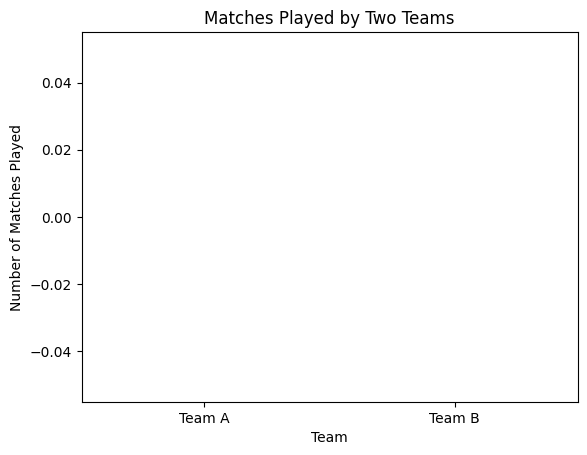

In [12]:
# prompt: plot two teams

import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'team1' and 'team2'
# Count the number of matches played by each team
team1_counts = df['team1'].value_counts()
team2_counts = df['team2'].value_counts()

# Combine the counts for each team
team_counts = team1_counts.add(team2_counts, fill_value=0)

# Select the two teams you want to plot (e.g., 'Team A' and 'Team B')
team1_to_plot = 'Team A'
team2_to_plot = 'Team B'

# Get the number of matches played by the two teams
if team1_to_plot in team_counts:
  team1_matches = team_counts[team1_to_plot]
else:
  team1_matches = 0
if team2_to_plot in team_counts:
  team2_matches = team_counts[team2_to_plot]
else:
  team2_matches = 0


# Create a bar plot
plt.bar(['Team A', 'Team B'], [team1_matches, team2_matches])
plt.xlabel('Team')
plt.ylabel('Number of Matches Played')
plt.title('Matches Played by Two Teams')
plt.show()

In [13]:
# prompt: read qualified.csv

import pandas as pd

# Assuming the file 'qualified.csv' is in the same directory as your notebook
df = pd.read_csv('qualified.csv')

# Print some basic information about the DataFrame
print(df.head())  # Display the first few rows
print(df.info())   # Show data types and non-null counts
print(df.describe()) # Generate descriptive statistics

  name draw
0  RUS   A1
1  KSA   A2
2  EGY   A3
3  URU   A4
4  POR   B1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    32 non-null     object
 1   draw    32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes
None
       name draw
count    32   32
unique   32   32
top     RUS   A1
freq      1    1


In [14]:
df=pd.read_csv('qualified.csv')

In [15]:
df

,name,draw
0,RUS,A1
1,KSA,A2
2,EGY,A3
3,URU,A4
4,POR,B1
5,ESP,B2
6,MAR,B3
7,IRN,B4
8,FRA,C1
9,AUS,C2


In [16]:
# prompt: Using dataframe df: compare two teams

# Assuming the 'draw' column contains information about the team and their performance
# We need to extract the team names and their performance data from the draw column.
# Let's say we want to compare Team A and Team B.

# Extract the necessary information (assuming format is something like "Team A: score")
# Replace this with the actual extraction logic based on the structure of your 'draw' column.

def extract_team_data(draw_string, team_name):
  """Extracts team data from the draw column based on team name."""
  # Here, you would write the code to extract score or other relevant information
  # for a specific team from the 'draw' column.
  # This is a placeholder function.
  # You'll need to adapt it to your specific data structure.
  return None  # Replace with the actual data

team_a_name = "Team A"
team_b_name = "Team B"

team_a_data = [extract_team_data(draw, team_a_name) for draw in df['draw']]
team_b_data = [extract_team_data(draw, team_b_name) for draw in df['draw']]

# Now we have data for both teams.
# We can use this data to compare the two teams.
# We can calculate metrics like average score, win rate, etc.
# For example:
#
# Compare average score
# average_score_team_a = sum(team_a_data) / len(team_a_data)
# average_score_team_b = sum(team_b_data) / len(team_b_data)
# print(f"Average score for Team A: {average_score_team_a}")
# print(f"Average score for Team B: {average_score_team_b}")

# Please replace the placeholder code with your actual logic for extracting
# and comparing the team information from the 'draw' column.

In [17]:
df.head()

,name,draw
0,RUS,A1
1,KSA,A2
2,EGY,A3
3,URU,A4
4,POR,B1


In [18]:
pd.read_csv('matches.csv')

,date,team1,team1Text,team2,team2Text,venue,IdCupSeason,CupName,team1Score,team2Score,statText,resText,team1PenScore,team2PenScore
0,19500308,WAL,Wales,NIR,Northern Ireland,"Cardiff, Wales",6,FIFA competition team qualification,0.0,0.0,NaN,0-0,NaN,NaN
1,19500402,ESP,Spain,POR,Portugal,"Madrid, Spain",6,FIFA competition team qualification,5.0,1.0,NaN,5-1,NaN,NaN
2,19500409,POR,Portugal,ESP,Spain,"Lisbon, Portugal",6,FIFA competition team qualification,2.0,2.0,NaN,2-2,NaN,NaN
3,19500415,SCO,Scotland,ENG,England,"Glasgow, Scotland",6,FIFA competition team qualification,0.0,1.0,NaN,0-1,NaN,NaN
4,19500624,BRA,Brazil,MEX,Mexico,"Rio De Janeiro, Brazil",7,FIFA competition team final,4.0,0.0,NaN,4-0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,20170720,MEX,Mexico,HON,Honduras,"Glendale, United States",275524,Confederation competition team final,1.0,0.0,NaN,1-0,NaN,NaN
31829,20170721,JAM,Jamaica,CAN,Canada,"Glendale, United States",275524,Confederation competition team final,2.0,1.0,NaN,2-1,NaN,NaN
31830,20170723,CRC,Costa Rica,USA,USA,"Arlington, United States",275524,Confederation competition team final,0.0,2.0,NaN,0-2,NaN,NaN
31831,20170724,MEX,Mexico,JAM,Jamaica,"Los Angeles, United States",275524,Confederation competition team final,0.0,1.0,NaN,0-1,NaN,NaN


In [19]:
df.head()

,name,draw
0,RUS,A1
1,KSA,A2
2,EGY,A3
3,URU,A4
4,POR,B1


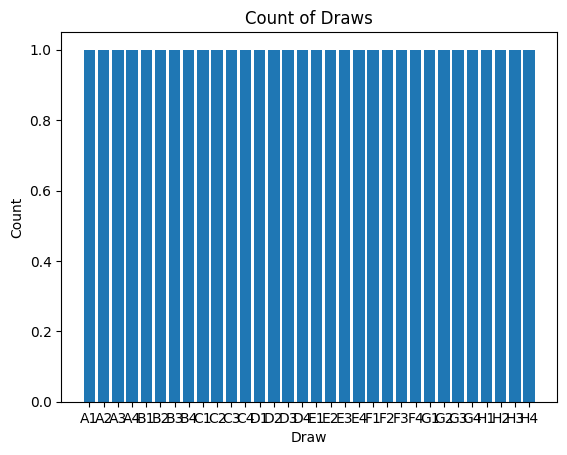

In [20]:
# prompt: Using dataframe df: plots

# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with columns 'name' and 'draw'.

# You can create various plots based on the available columns, but since we don't have numerical data in this dataframe, let's create a bar plot to count how many times each draw appears.

# Create a countplot using matplotlib
draw_counts = df.groupby('draw')['name'].count().reset_index(name='count')
plt.bar(draw_counts['draw'], draw_counts['count'])
plt.xlabel('Draw')
plt.ylabel('Count')
plt.title('Count of Draws')
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Load matches dataset
matches = pd.read_csv('matches.csv')

# Load teams dataset
teams = pd.read_csv('teams.csv')

# Load qualified teams dataset
qualified = pd.read_csv('qualified.csv')


In [23]:
# Display first few rows
print("Matches Dataset:")
print(matches.head())

print("\nTeams Dataset:")
print(teams.head())

print("\nQualified Teams Dataset:")
print(qualified.head())

# Get basic information
print("\nMatches Info:")
print(matches.info())

print("\nTeams Info:")
print(teams.info())

print("\nQualified Info:")
print(qualified.info())


Matches Dataset:
       date team1 team1Text team2         team2Text                   venue  \
0  19500308   WAL     Wales   NIR  Northern Ireland          Cardiff, Wales   
1  19500402   ESP     Spain   POR          Portugal           Madrid, Spain   
2  19500409   POR  Portugal   ESP             Spain        Lisbon, Portugal   
3  19500415   SCO  Scotland   ENG           England       Glasgow, Scotland   
4  19500624   BRA    Brazil   MEX            Mexico  Rio De Janeiro, Brazil   

   IdCupSeason                              CupName  team1Score  team2Score  \
0            6  FIFA competition team qualification         0.0         0.0   
1            6  FIFA competition team qualification         5.0         1.0   
2            6  FIFA competition team qualification         2.0         2.0   
3            6  FIFA competition team qualification         0.0         1.0   
4            7          FIFA competition team final         4.0         0.0   

  statText resText  team1PenScore

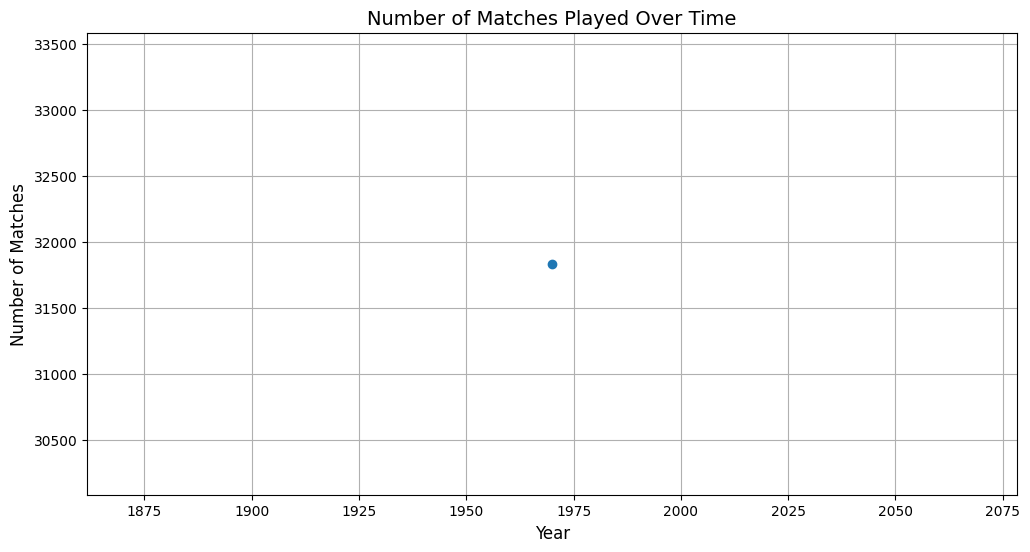

In [24]:
matches['year'] = pd.to_datetime(matches['date']).dt.year
matches_per_year = matches['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
matches_per_year.plot(kind='line', marker='o')
plt.title('Number of Matches Played Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.grid(True)
plt.show()


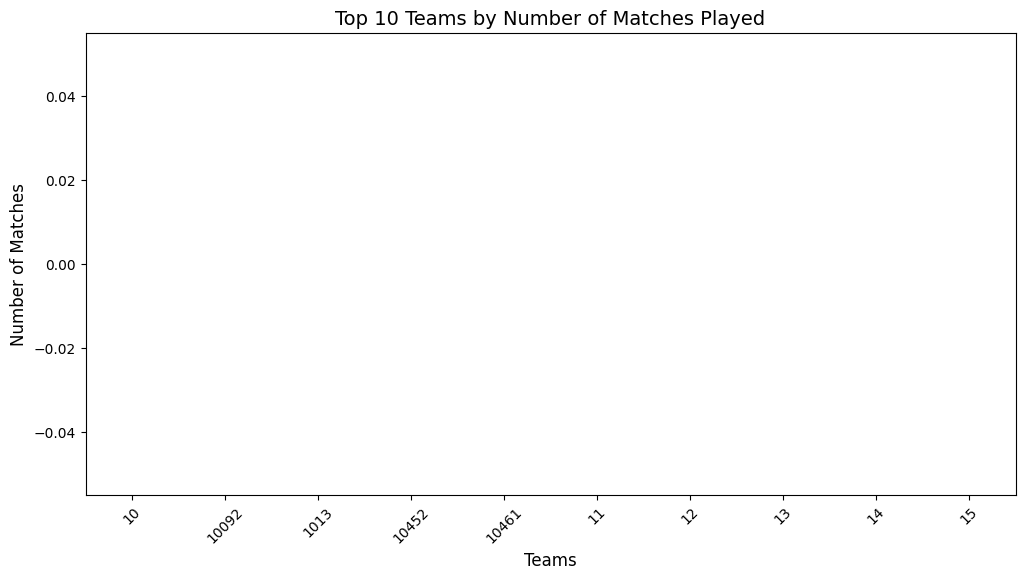

In [26]:
# Load matches dataset, specifying column names
matches = pd.read_csv('matches.csv', names=['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral'])

teams_played = matches['home_team'].value_counts() + matches['away_team'].value_counts()

top_10_teams = teams_played.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_teams.plot(kind='bar', color='skyblue')
plt.title('Top 10 Teams by Number of Matches Played', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.show()

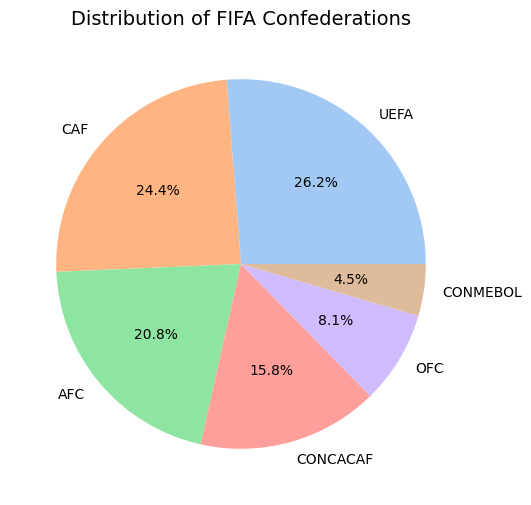

In [27]:
confederation_counts = teams['confederation'].value_counts()

plt.figure(figsize=(8, 6))
confederation_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of FIFA Confederations', fontsize=14)
plt.ylabel('')
plt.show()


In [31]:
print("\nWorld Cup Group Stage Draw:")
# Assuming 'draw' column contains the group information like 'A1', 'B1', etc.
# Extract the group letter (A, B, C, etc.) from the 'draw' column
qualified['group'] = qualified['draw'].str[0]  # Extract first character for group
print(qualified.groupby('group')['team'].apply(list))


World Cup Group Stage Draw:


KeyError: 'Column not found: team'

In [32]:
# Save cleaned data
matches.to_csv('cleaned_matches.csv', index=False)
teams.to_csv('cleaned_teams.csv', index=False)
qualified.to_csv('cleaned_qualified.csv', index=False)

print("Cleaned data saved!")


Cleaned data saved!


done 
